In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

In [2]:
df=loadmat("/Users/xinjianlu/Downloads/ex5data1.mat")
X,y,Xtest,ytest,Xval,yval=df["X"],df["y"],df["Xtest"],df["ytest"],df["Xval"],df["yval"]

In [3]:
X=np.insert(X,0,1,axis=1)
Xtest=np.insert(Xtest,0,1,axis=1)
Xval=np.insert(Xval,0,1,axis=1)

In [4]:
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

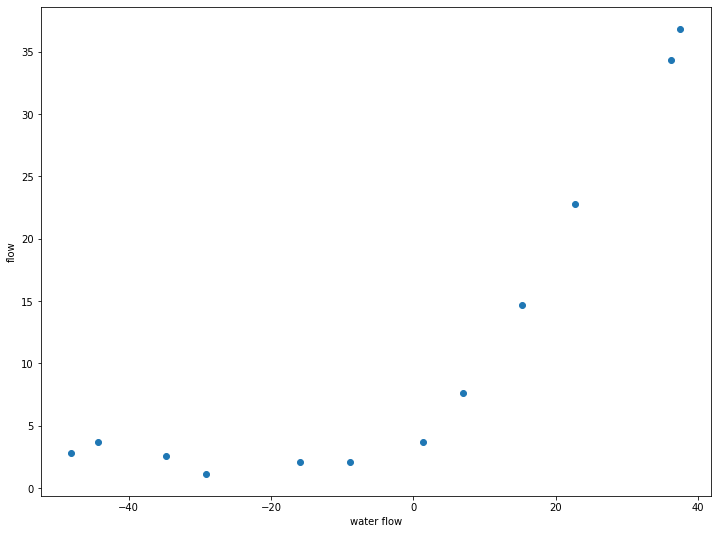

In [5]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,1:],y)
plt.xlabel("water flow")
plt.ylabel("flow")
plt.show()

In [6]:
def cost_function(X,y,theta):
    #X: R(m*n), m records, n features
    #y: R(m)
    #theta : R(n), linear regression parameters
    inner=np.power(((np.dot(X,theta))-y.flatten()),2)
    return np.sum(inner)/(2*len(X))

In [140]:
res=trainLinearReg(X_norm[:10,:],y[:10,:],0)
np.dot(Xval_norm,res)

array([-1.25747494e+00, -3.15072696e-01,  3.74883241e+01,  3.45893842e+01,
        7.16820474e-01, -2.02550798e-01,  7.13405575e+00,  3.33197435e+00,
        1.61019831e-02,  6.97666887e+00,  8.36250847e-01,  2.03043328e+01])

In [7]:
theta=np.ones(X.shape[1])
theta

array([1., 1.])

In [8]:
cost_function(X,y,theta)

303.9515255535976

In [17]:
def gradient(X,y,theta):
    m=X.shape[0]
    
    grad=(X@theta-y.flatten())@X
    
    return grad/m

In [18]:
gradient(X,y,theta)

array([-15.30301567, 598.16741084])

In [25]:
def regularized_gradient(X,y,theta,l):
    m=X.shape[0]
    
    regularized_term=theta.copy()
    regularized_term[0]=0
    
    regularized_term=(l/m) * regularized_term
    
    return regularized_term+gradient(X,y,theta)

In [28]:
regularized_gradient(X,y,theta,1)

array([-15.30301567, 598.25074417])

In [30]:
def regularized_cost(theta, X, y, l):
    m = X.shape[0]

    regularized_term = (l / (2 * m)) * np.power(theta[1:], 2).sum()

    return regularized_term+cost_function(X,y,theta)

In [31]:
regularized_cost(theta, X, y, l=1)

303.9931922202643

In [39]:
def gradientReg(theta, X, y, l):
    """
    theta: 1-d array with shape (2,)
    X: 2-d array with shape (12, 2)
    y: 2-d array with shape (12, 1)
    l: lambda constant
    grad has same shape as theta (2,)
    """
    grad = (X @ theta - y.flatten()) @ X
    regterm = l * theta
    regterm[0] = 0  # #don't regulate bias term
    return (grad + regterm) / len(X)

In [42]:
def trainLinearReg(X, y, l):
    theta = np.zeros(X.shape[1])
    res = opt.minimize(fun=regularized_cost, 
                       x0=theta, 
                       args=(X, y ,l), 
                       method='TNC', 
                       jac=gradientReg)
    return res.x

In [45]:
fit_theta=trainLinearReg(X, y, 0)

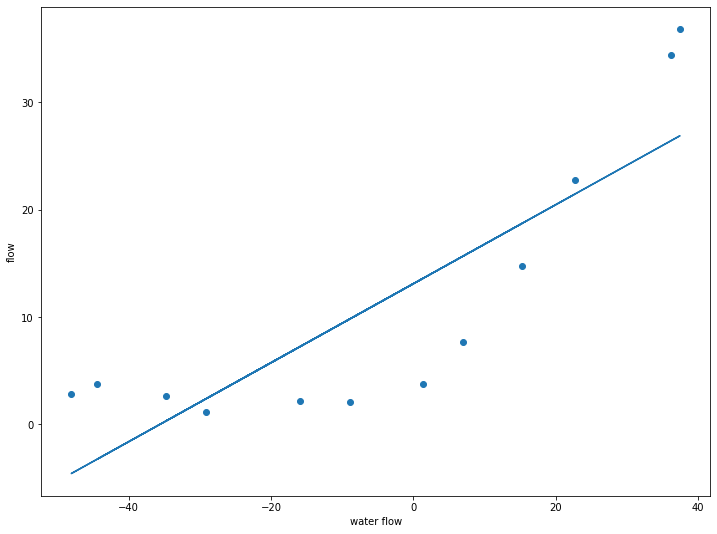

In [46]:
plt.figure(figsize=(12,9))
plt.scatter(X[:,1:],y)
plt.plot(X[:,1],np.dot(X,fit_theta))
plt.xlabel("water flow")
plt.ylabel("flow")
plt.show()

In [141]:
def learning_curve(X,y,Xval,yval,l):
    xx=range(1,len(X)+1)
    training_cost,cv_cost=[],[]
    for i in xx:
        
        res=trainLinearReg(X[:i,:],y[:i,:],l)
        training_cost_i=regularized_cost(res, X[:i], y[:i], l)
        cv_cost_i=regularized_cost(res,Xval,yval,l)
        training_cost.append(training_cost_i)
        cv_cost.append(cv_cost_i)
    
    plt.figure(figsize=(15,9))
    plt.plot(xx,training_cost,label="training cost")
    plt.plot(xx,cv_cost,label="cv cost")
    plt.legend()
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.title('Learning curve for linear regression')

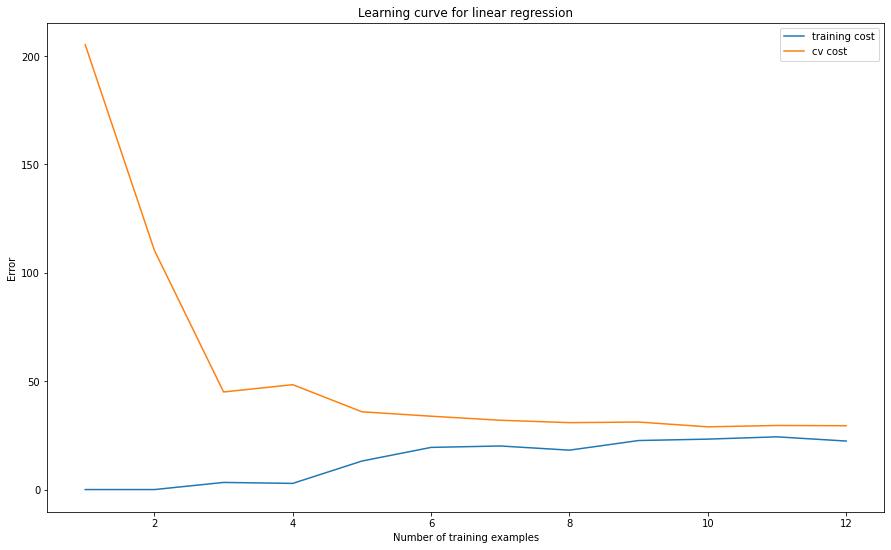

In [149]:
learning_curve(X, y, Xval, yval, 0)

In [204]:
def getPolyFeatures(X,power):
    Xpoly=X.copy()
    for i in range(2,power+1):
        Xpoly=np.insert(Xpoly,Xpoly.shape[1],np.power(Xpoly[:,1],i),axis=1)
    return Xpoly

In [205]:
def get_means_std(X):
    means=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return means,std

In [206]:
def feature_normalized(X,means,std):
    X_norm=X.copy()
    X[:,1:]=X[:,1:]-means[1:]
    X[:,1:]=X[:,1:]-std[1:]
    return X_norm

In [207]:
power=6
train_means,train_stds=get_means_std(getPolyFeatures(X,power))

In [208]:
X_norm=feature_normalized(getPolyFeatures(X,power),train_means,train_stds)

In [209]:
Xval_norm=feature_normalized(getPolyFeatures(Xval,power), train_means, train_stds)
Xtest_norm=feature_normalized(getPolyFeatures(Xtest,power), train_means, train_stds)

In [210]:
def plot_fit(means,stds,l):
    theta=trainLinearReg(X_norm,y,l)
    x=np.linspace(-75,55,50)
    xmat = x.reshape(-1, 1)
    xmat = np.insert(xmat,0,1,axis=1)
    xmat = getPolyFeatures(xmat, power)
    xmat_norm = feature_normalized(xmat, means, stds)
    
    plt.figure(figsize=(12,9))
    plt.scatter(X[:,1:],y)
    plt.plot(x, xmat_norm@theta,'b--')
    plt.xlabel("water flow")
    plt.ylabel("flow")
    plt.show()

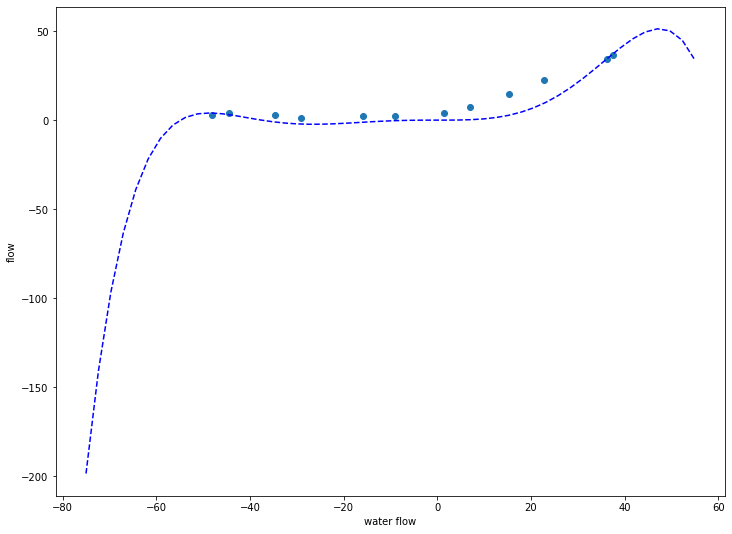

In [211]:
plot_fit(train_means, train_stds, 10)

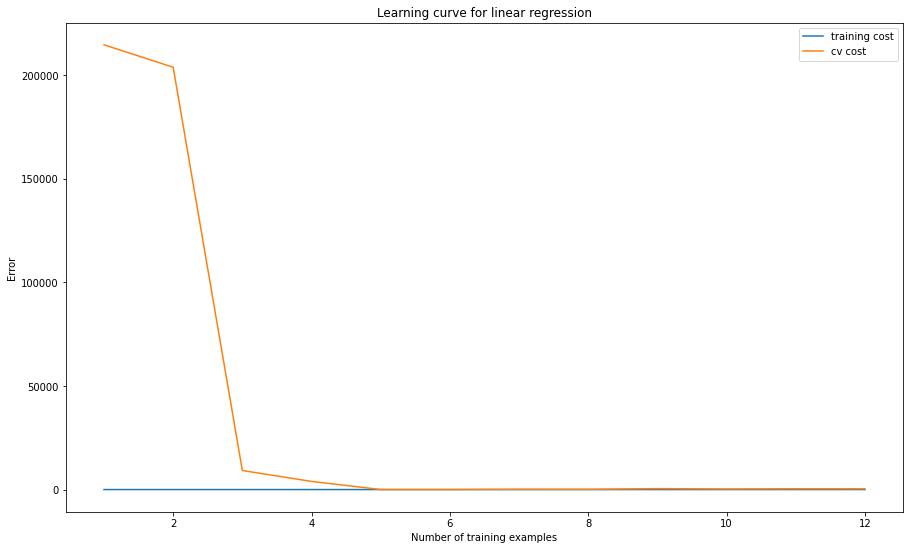

In [212]:
learning_curve(X_norm, y, Xval_norm, yval, 0)

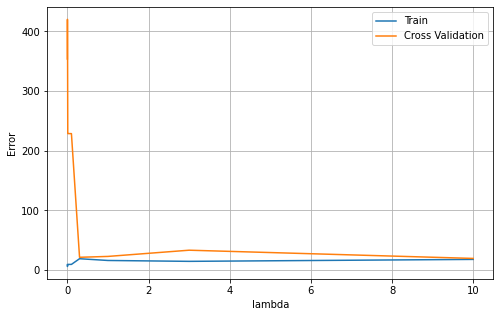

In [213]:
lambdas = [0., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1., 3., 10.]
errors_train, errors_val = [], []
for l in lambdas:
    theta = trainLinearReg(X_norm, y, l)
    errors_train.append(regularized_cost(theta,X_norm,y,0))  # 记得把lambda = 0
    errors_val.append(regularized_cost(theta,Xval_norm,yval,0))
    
plt.figure(figsize=(8,5))
plt.plot(lambdas,errors_train,label='Train')
plt.plot(lambdas,errors_val,label='Cross Validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('Error')
plt.grid(True)

In [214]:
lambdas[np.argmin(errors_val)]

10.0